In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import scipy.stats as stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import FunctionTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [18]:
df = sns.load_dataset('titanic')
df = df[['alive', 'age', 'fare']]
df.head()

,alive,age,fare
0,no,22.0,7.2500
1,yes,38.0,71.2833
2,yes,26.0,7.9250
3,yes,35.0,53.1000
4,no,35.0,8.0500


In [19]:
df['age'] = df['age'].fillna(df['age'].mean())
df.head()

,alive,age,fare
0,no,22.0,7.2500
1,yes,38.0,71.2833
2,yes,26.0,7.9250
3,yes,35.0,53.1000
4,no,35.0,8.0500


In [20]:
df.isna().sum()

alive    0
age      0
fare     0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['alive'] = le.fit_transform(df['alive'])

In [22]:
df.dtypes

alive      int64
age      float64
fare     float64
dtype: object

In [23]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

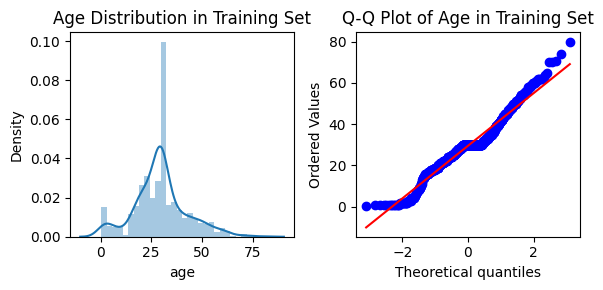

In [25]:
plt.figure(figsize=(6, 3))
plt.subplot(121)
sns.distplot(x_train['age'], bins=30, kde=True)
plt.title('Age Distribution in Training Set')

plt.subplot(122)
stats.probplot(x_train['age'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age in Training Set')

plt.tight_layout()
plt.show()




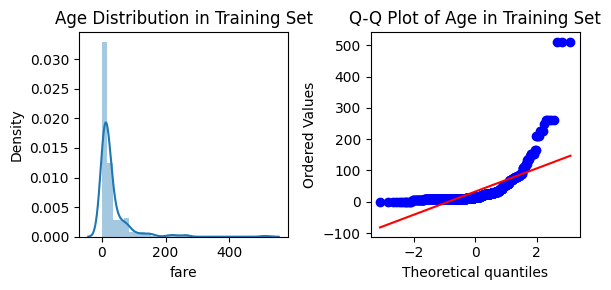

In [26]:
plt.figure(figsize=(6, 3))
plt.subplot(121)
sns.distplot(x_train['fare'], bins=30, kde=True)
plt.title('Age Distribution in Training Set')

plt.subplot(122)
stats.probplot(x_train['fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age in Training Set')

plt.tight_layout()
plt.show()




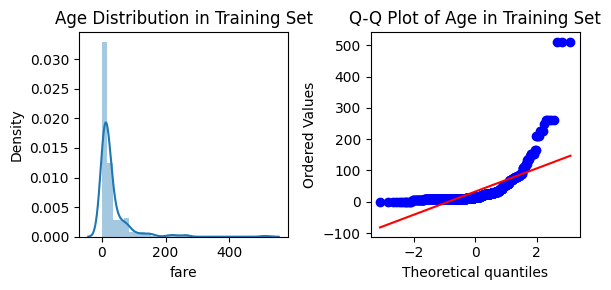

In [27]:
plt.figure(figsize=(6, 3))
plt.subplot(121)
sns.distplot(x_train['fare'], bins=30, kde=True)
plt.title('Age Distribution in Training Set')

plt.subplot(122)
stats.probplot(x_train['fare'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Age in Training Set')

plt.tight_layout()
plt.show()




In [28]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred1))   

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.6759776536312849


In [29]:
trf  = FunctionTransformer(func =np.log1p)
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed, y_train)
clf2.fit(x_train_transformed, y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred1))   

Logistic Regression Accuracy: 0.6815642458100558
Decision Tree Accuracy: 0.6927374301675978


In [ ]:
x_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print
